# Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# Import Libraries

In [397]:
#data processing
import pandas as pd
import numpy as np
import re

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# machine learning algorithms
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [332]:
train=pd.read_excel('Data_Train.xlsx')

In [333]:
test=pd.read_excel('Test_set.xlsx')

In [334]:
train.shape,test.shape

((10683, 11), (2671, 10))

In [335]:
#checking the first 5 rows of train set
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [336]:
#checking the first 5 rows of test set
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [337]:
#checking size of both datasets
train.shape  ,  test.shape

((10683, 11), (2671, 10))

In [338]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [339]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Train dataset contains 10683 observations for flight prices with 10 parameters and target variable Price.

It contains certain one null value in Route and Total stops.

In [340]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


Test dataset contains 2671 observations for doctor consultation fees with 10 parameters.

We observe certain no null values in this set.

In [341]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [342]:
#dropping null data
train.dropna(inplace=True)

Feature Engineering

In [343]:
#check values in additional info
train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [344]:
test["Additional_Info"].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [345]:
#merge No info and No Info into 1 value in Train data
train["Additional_Info"] = train["Additional_Info"].str.replace('No info', 'No Info')

In [346]:
# Duration convert to minutes
train['Duration']=train['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test['Duration']=test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [347]:
#Split Journey Date into Day, Year and Month attributes for Train data
train["Day"] = train['Date_of_Journey'].str.split('/').str[0].astype(int)
train["Month"] = train['Date_of_Journey'].str.split('/').str[1].astype(int)
train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [348]:
#Split Journey Date into Day, Year and Month attributes for Test data
test["Day"] = test['Date_of_Journey'].str.split('/').str[0].astype(int)
test["Month"] = test['Date_of_Journey'].str.split('/').str[1].astype(int)
test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [349]:
#extracting numerics from stops feature- Train
train['Total_Stops'],_=train['Total_Stops'].str.split(' stops').str
train['Total_Stops'],_=train['Total_Stops'].str.split(' stop').str

In [350]:
train['Total_Stops']=train['Total_Stops'].apply(lambda x: 0 if 'non-stop' in x else x)

In [351]:
#extracting numerics from stops feature- Test
test['Total_Stops'],_=test['Total_Stops'].str.split(' stops').str
test['Total_Stops'],_=test['Total_Stops'].str.split(' stop').str

In [352]:
test['Total_Stops']=test['Total_Stops'].apply(lambda x: 0 if 'non-stop' in x else x)

In [353]:
# Dep_Time
train["Dep_Hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train["Dep_Mins"] = pd.to_datetime(train["Dep_Time"]).dt.minute
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [354]:
# Dep_Time
test["Dep_Hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_Mins"] = pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis = 1, inplace = True)

In [355]:
# extract Arrival Time
train["Arrival_Hour"] = pd.to_datetime(train.Arrival_Time).dt.hour
train["Arrival_Mins"] = pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [356]:
# extract Arrival Time - Test
test["Arrival_Hour"] = pd.to_datetime(test.Arrival_Time).dt.hour
test["Arrival_Mins"] = pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Exploratory Data Analysis (EDA)

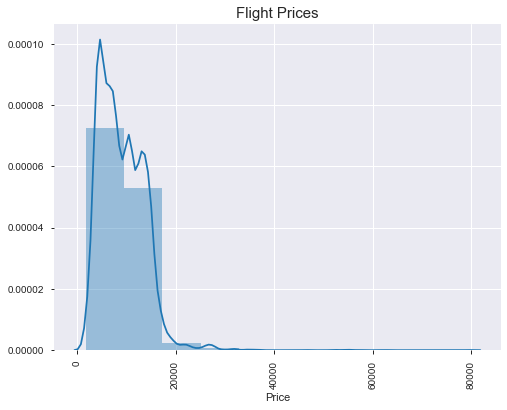

In [412]:
plt.figure(figsize=(8,6))
sns.distplot(train['Price'], bins=10)
plt.title('Flight Prices', size=15)
plt.xticks(rotation=90)
plt.show()

We see price concentration in the range of 1800-20000.

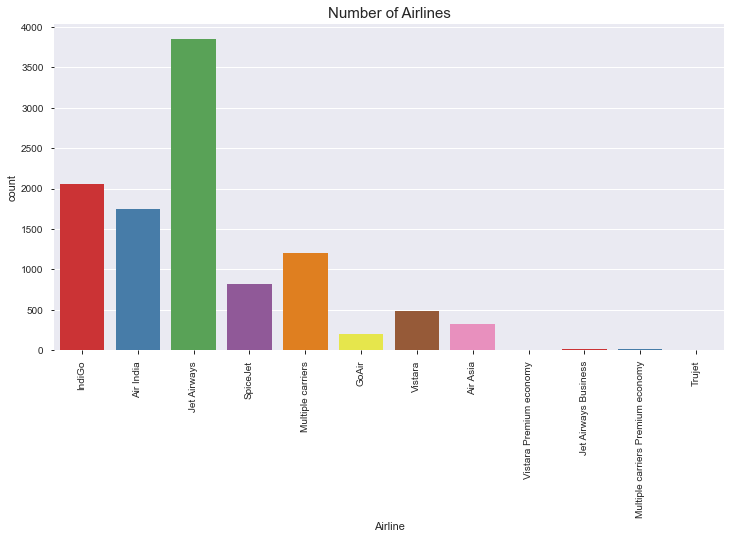

In [358]:
plt.figure(figsize=(12,6))
sns.countplot(train['Airline'], palette='Set1')
plt.title('Number of Airlines', size=15)
plt.xticks(rotation=90)
plt.show()

We see a few airlines dominating this space- Jet Airways, Indigo, Air India.

Text(0, 0.5, 'Number of flights')

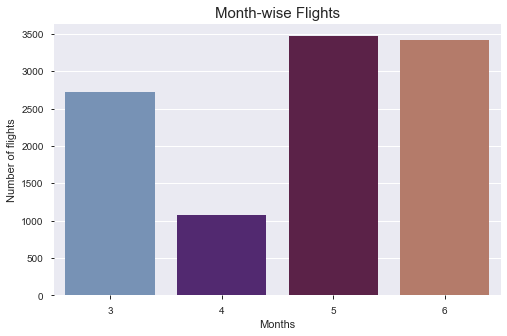

In [359]:
plt.figure(figsize=(8, 5))
plt.title('Month-wise Flights', size=15)
sns.countplot(train['Month'], palette="twilight")
plt.xlabel('Months')
plt.ylabel('Number of flights')

We see peak volume of fliers in the months of May, June and March.

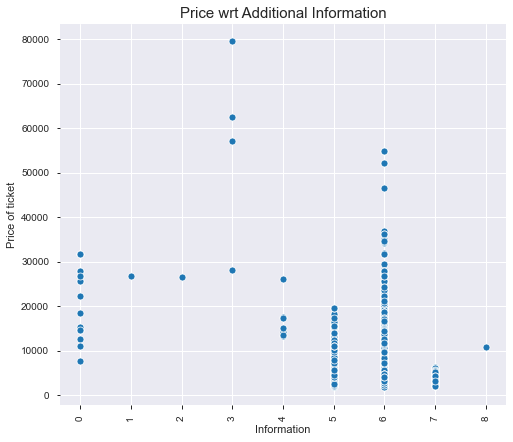

In [411]:
plt.figure(figsize = (8, 7))
plt.title('Price wrt Additional Information',size=15)
sns.scatterplot(train['Additional_Info'], train['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

Predictably, we see that Price is higher for Business class fliers and for those with a long layover. 
For fliers without meals or check-in baggage options, prices are lower.

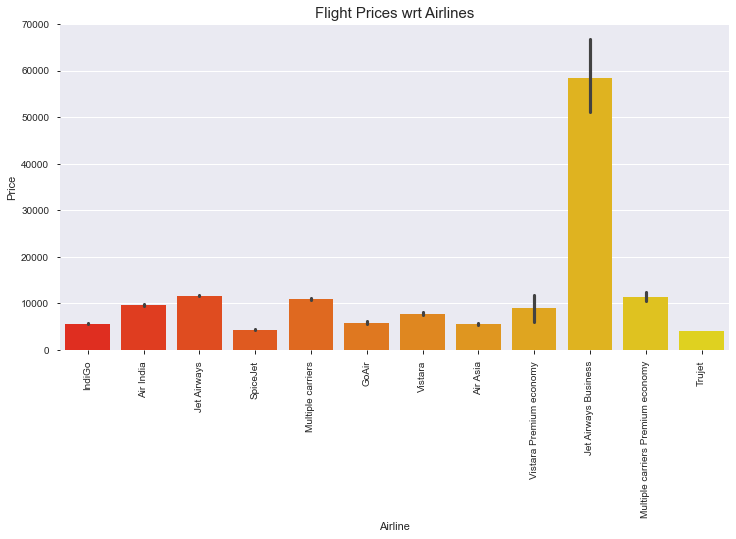

In [361]:
plt.figure(figsize=(12,6))
sns.barplot(train['Airline'], train['Price'], palette='autumn')
plt.title('Flight Prices wrt Airlines', size=15)
plt.xticks(rotation=90)
plt.show()

We see that Flight Prices are peaked for Jet Airways Business in comparison with other flights.

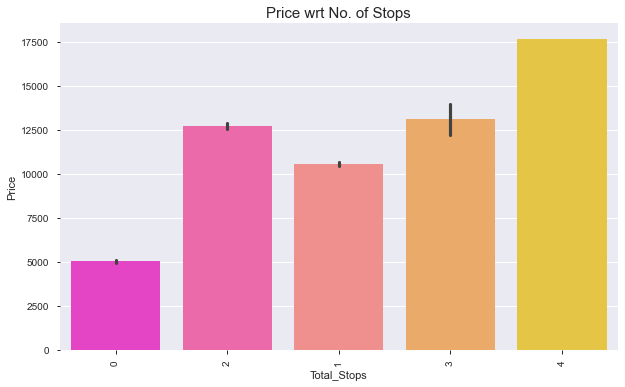

In [362]:
plt.figure(figsize=(10,6))
sns.barplot(train['Total_Stops'], train['Price'], palette='spring')
plt.title('Price wrt No. of Stops', size=15)
plt.xticks(rotation=90)
plt.show()

We see that higher number of stops imply higher flight prices.

# Data Pre-Processing

In [363]:
#converting number of stops to numerics
train['Total_Stops']=pd.to_numeric(train['Total_Stops'])
test['Total_Stops']=pd.to_numeric(test['Total_Stops'])

In [366]:
#Encoding categorical data using Label Encoder- Train

columns = ['Airline','Source','Destination','Route','Additional_Info']

for i in columns:
    LE=LabelEncoder()
    train[i] = LE.fit_transform(train[i])

In [367]:
#Encoding categorical data using Label Encoder- Test

for i in columns:
    LE=LabelEncoder()
    test[i] = LE.fit_transform(test[i])

In [368]:
#splitting dataframe into x and y
x = train.drop('Price', axis = 1)
y = train['Price']

In [369]:
#checking skewness
x.skew()

Airline            0.731057
Source            -0.424023
Destination        1.244046
Route             -0.501911
Duration           0.861411
Total_Stops        0.317109
Additional_Info   -3.258628
Day                0.118174
Month             -0.387409
Dep_Hour           0.112924
Dep_Mins           0.167234
Arrival_Hour      -0.370146
Arrival_Mins       0.110945
dtype: float64

In [371]:
#using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [372]:
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

Airline           -0.015281
Source            -0.238295
Destination        0.041570
Route             -0.442919
Duration          -0.045479
Total_Stops       -0.059185
Additional_Info    0.188975
Day               -0.203875
Month             -0.216730
Dep_Hour          -0.104258
Dep_Mins          -0.359497
Arrival_Hour      -0.356878
Arrival_Mins      -0.347628
dtype: float64

In [373]:
x=df_new

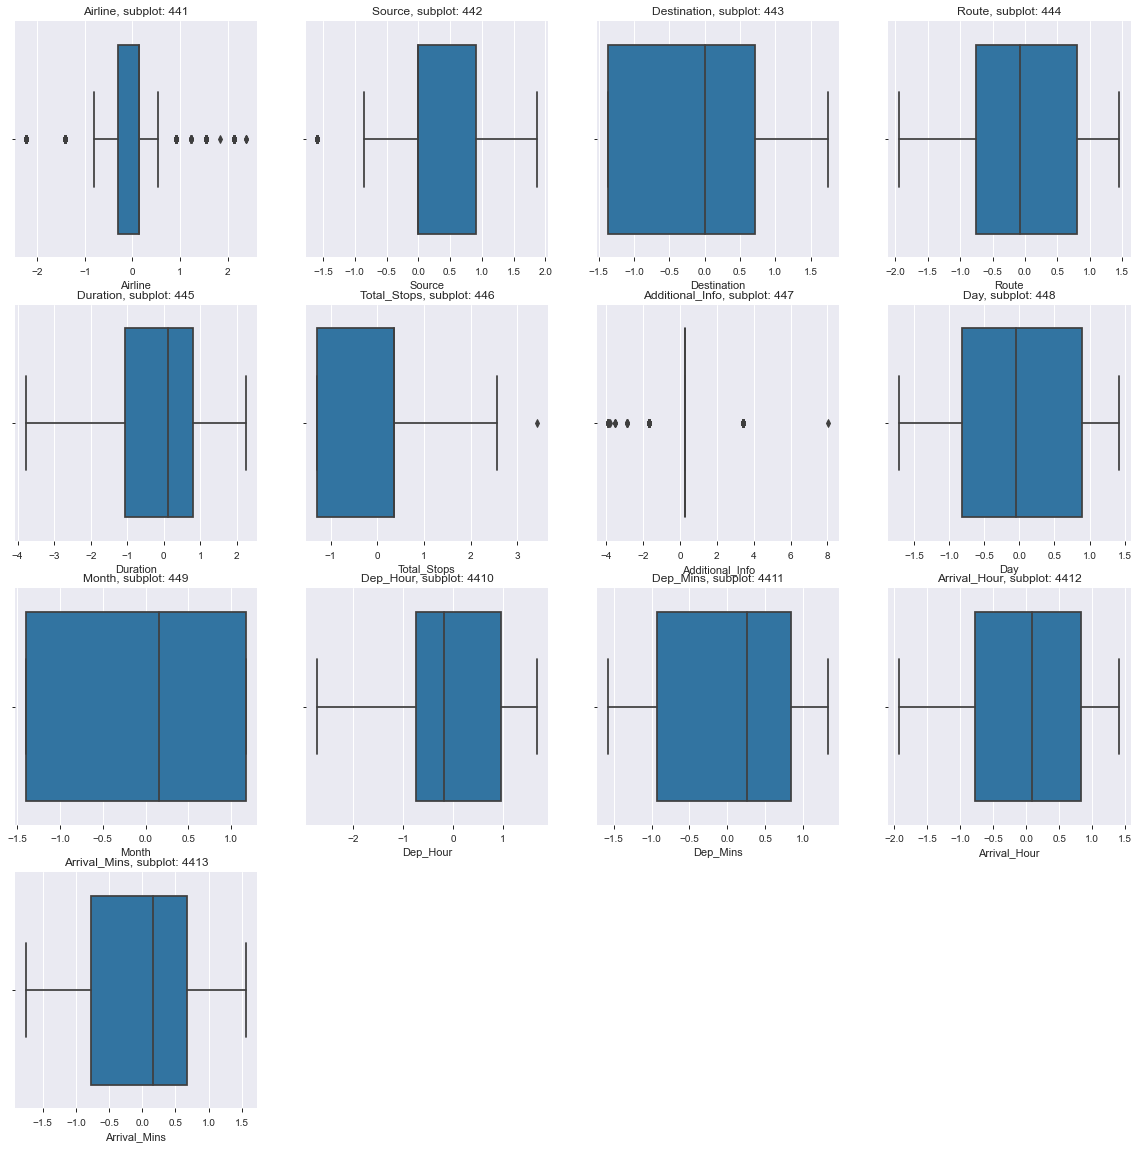

In [382]:
#Outlier check

cols = ['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Day', 'Month', 'Dep_Hour', 'Dep_Mins',
       'Arrival_Hour', 'Arrival_Mins']

a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,20))

for i in cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x[i])
    c = c + 1

plt.show()

No significant outliers observed. Only few close to the whiskers of the boxplots.

In [383]:
#Scale the data in x
std = StandardScaler()
x = std.fit_transform(x)

# Random State

In [385]:
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25, random_state=i)
    RF= RandomForestRegressor()
    RF.fit(x_train,y_train)
    pred_train=RF.predict(x_train)
    pred_test = RF.predict(x_test)
    print(f"With random state {i}, the training accuracy is: {r2_score(y_train, pred_train)}")
    print(f"With random state {i}, the testing accuracy is: {r2_score(y_test, pred_test)}")
    print("\n")

With random state 1, the training accuracy is: 0.9795868796658699
With random state 1, the testing accuracy is: 0.8740278901764584


With random state 2, the training accuracy is: 0.9800146715684189
With random state 2, the testing accuracy is: 0.8677566630219973


With random state 3, the training accuracy is: 0.981342821388293
With random state 3, the testing accuracy is: 0.8632700550312645


With random state 4, the training accuracy is: 0.9776219636379084
With random state 4, the testing accuracy is: 0.9082215592287516


With random state 5, the training accuracy is: 0.9800785823487673
With random state 5, the testing accuracy is: 0.8601755211710425


With random state 6, the training accuracy is: 0.9798627310282871
With random state 6, the testing accuracy is: 0.8760528989515562


With random state 7, the training accuracy is: 0.9808498290099995
With random state 7, the testing accuracy is: 0.9043015803063136


With random state 8, the training accuracy is: 0.9823695423562725
With

With random state 62, the training accuracy is: 0.980897653367843
With random state 62, the testing accuracy is: 0.8745708163362548


With random state 63, the training accuracy is: 0.9824493094363197
With random state 63, the testing accuracy is: 0.8533376011281779


With random state 64, the training accuracy is: 0.9803637555175345
With random state 64, the testing accuracy is: 0.9082525114266892


With random state 65, the training accuracy is: 0.9815761338238097
With random state 65, the testing accuracy is: 0.8619114530943673


With random state 66, the training accuracy is: 0.9799191624065059
With random state 66, the testing accuracy is: 0.8657234324716563


With random state 67, the training accuracy is: 0.9796524440864968
With random state 67, the testing accuracy is: 0.917936120913114


With random state 68, the training accuracy is: 0.9791113500071715
With random state 68, the testing accuracy is: 0.8856680524619408


With random state 69, the training accuracy is: 0.9795869

In [386]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=51)

Testing Multiple Models

In [387]:
model_grid = {"Linear": LinearRegression(),
              "Ridge": Ridge(),
              "Lasso": Lasso(),
              "ElasticNet": ElasticNet(),
              "KNN": KNeighborsRegressor(),
              "DTR": DecisionTreeRegressor(),
              "RF": RandomForestRegressor(random_state=84),
              "XGB": xgb.XGBRegressor(),
              "GBM": GradientBoostingRegressor()}

scores_dict = {}
for name, model in model_grid.items():
    model.fit(x_train, y_train)
    rmse = np.mean(np.sqrt(-cross_val_score(model, x_test, y_test, cv=10, scoring="neg_mean_squared_error")))
    scores_dict[name] = rmse

scores_dict = {k: v for k, v in sorted(scores_dict.items(), key=lambda item: item[1])}
scores_dict

{'XGB': 1489.2463766861658,
 'RF': 1579.1800726436759,
 'GBM': 1864.0756279675957,
 'DTR': 1962.1954054021844,
 'KNN': 2363.9686584406763,
 'Ridge': 3069.8446572445537,
 'Lasso': 3069.8491741157172,
 'Linear': 3069.870313769533,
 'ElasticNet': 3177.808422197618}

# Hyper Parameter Tuning

In [402]:
# GBM Regressor


gb_model = GradientBoostingRegressor()


gb_params = {"n_estimators":[5,50,250],
    "learning_rate":[0.01,0.1,0.2] }


gb_cv_model = GridSearchCV(gb_model, gb_params, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


gb_tuned = GradientBoostingRegressor(**gb_cv_model.best_params_).fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   55.5s finished


In [392]:
# Random Forests Regressor


rf_model = RandomForestRegressor(random_state=6106)


rf_params = {"max_depth": [5, 8, None],
             "n_estimators": [200, 500],
             "min_samples_split": [2, 5, 10]}


rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  7.9min finished


In [401]:
# XGB Regressor


xgb_model = XGBRegressor()


xgb_param = {"learning_rate"    : [0.05, 0.10, 0.15 ] ,
 "max_depth"        : [ 3, 4, 5,],
 "min_child_weight" : [ 1, 3, 5,  ] }


xgb_cv_model = GridSearchCV(xgb_model, xgb_param, cv=10, n_jobs=-1, verbose=1).fit(x_train, y_train)


xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(x_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.7min finished


In [403]:
from sklearn.metrics import mean_squared_error
from itertools import islice

# set tuned models
tuned_grid = dict([("RF", rf_tuned), ("XGB", xgb_tuned), ("GradientBoost", gb_tuned)])

# get rmse values from tuned models
tuned_scores = {}
for name, model in tuned_grid.items():
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    tuned_scores[name] = rmse

# sorting rmse
tuned_scores = {k: v for k, v in sorted(tuned_scores.items(), key=lambda item: item[1])}

# choose best model
best_model = dict(islice(tuned_scores.items(), 1))
best_model

{'RF': 1226.868296144605}

In [404]:
import pickle
filename= 'flightprices.pkl'
pickle.dump(rf_tuned, open(filename, 'wb'))

Using best fit model on the Test dataset

In [405]:
fitted_model=pickle.load(open("flightprices.pkl","rb"))

In [406]:
fitted_model

RandomForestRegressor(n_estimators=500)

Predicted Output Array

In [407]:
predictions=fitted_model.predict(test)

In [408]:
predictions

array([20862.664, 20923.286, 17366.034, ..., 20862.664, 21311.956,
       20862.664])